<a href="https://colab.research.google.com/github/utkarsh7237/course-era-project/blob/master/churnprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

UTKARSH MISHRA(7068679779)

### Importing the data

In [ ]:
# use these links to
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
data=pd.read_csv("Churn.csv")
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import urllib.re

### Understanding the data

In [ ]:

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data=data.drop('customerID',axis=1)

In [ ]:
data[data.iloc[:,:]==' '] = np.NaN

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data=data.fillna(data.mean())

In [ ]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [ ]:
datacol=data.columns
datacol
le = preprocessing.LabelEncoder()
for i in datacol:
    data[i]=le.fit_transform(data[i])
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [ ]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]

In [ ]:
corr_matrix = data.corr()
corr_matrix['Churn']

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.183523
TotalCharges       -0.231129
Churn               1.000000
Name: Churn, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
features = fit.transform(X)
features

array([[   1,    0,  142,   74],
       [  34,    1,  498, 3624],
       [   2,    0,  436,  536],
       ...,
       [  11,    0,  137, 1265],
       [   4,    0,  795, 1157],
       [  66,    2, 1388, 6151]])

In [ ]:
e=['Partner','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup','TechSupport', 'StreamingTV',
       'StreamingMovies','PaymentMethod',
       'MonthlyCharges', 'TotalCharges']
print(features[0:10,:])
np.set_printoptions(precision=3) 
print(fit.scores_)

[[   1    0  142   74]
 [  34    1  498 3624]
 [   2    0  436  536]
 [  45    1  266 3570]
 [   2    0  729  674]
 [   8    0 1274 2173]
 [  22    0 1075 3673]
 [  10    0  140 1145]
 [  28    0 1371 4385]
 [  62    1  482 4632]]
[2.587e-01 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 9.747e+00
 9.821e+00 5.516e+02 2.301e+02 1.913e+02 5.233e+02 7.490e+00 8.235e+00
 1.116e+03 1.057e+02 5.849e+01 7.945e+04 4.572e+05]


In [ ]:
from sklearn.preprocessing import StandardScaler
x=data.loc[:,e]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)
X

array([[-1.01 , -0.44 ,  1.035, ...,  0.399, -1.132, -1.56 ],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.388,  0.269],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.517, -1.322],
       ...,
       [-1.01 , -0.44 ,  1.035, ...,  0.399, -1.142, -0.946],
       [ 0.991,  2.273,  1.035, ...,  1.335,  0.233, -1.002],
       [ 0.991, -0.44 , -0.967, ..., -1.474,  1.472,  1.57 ]])

### Data Visualization

In [ ]:
y.value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


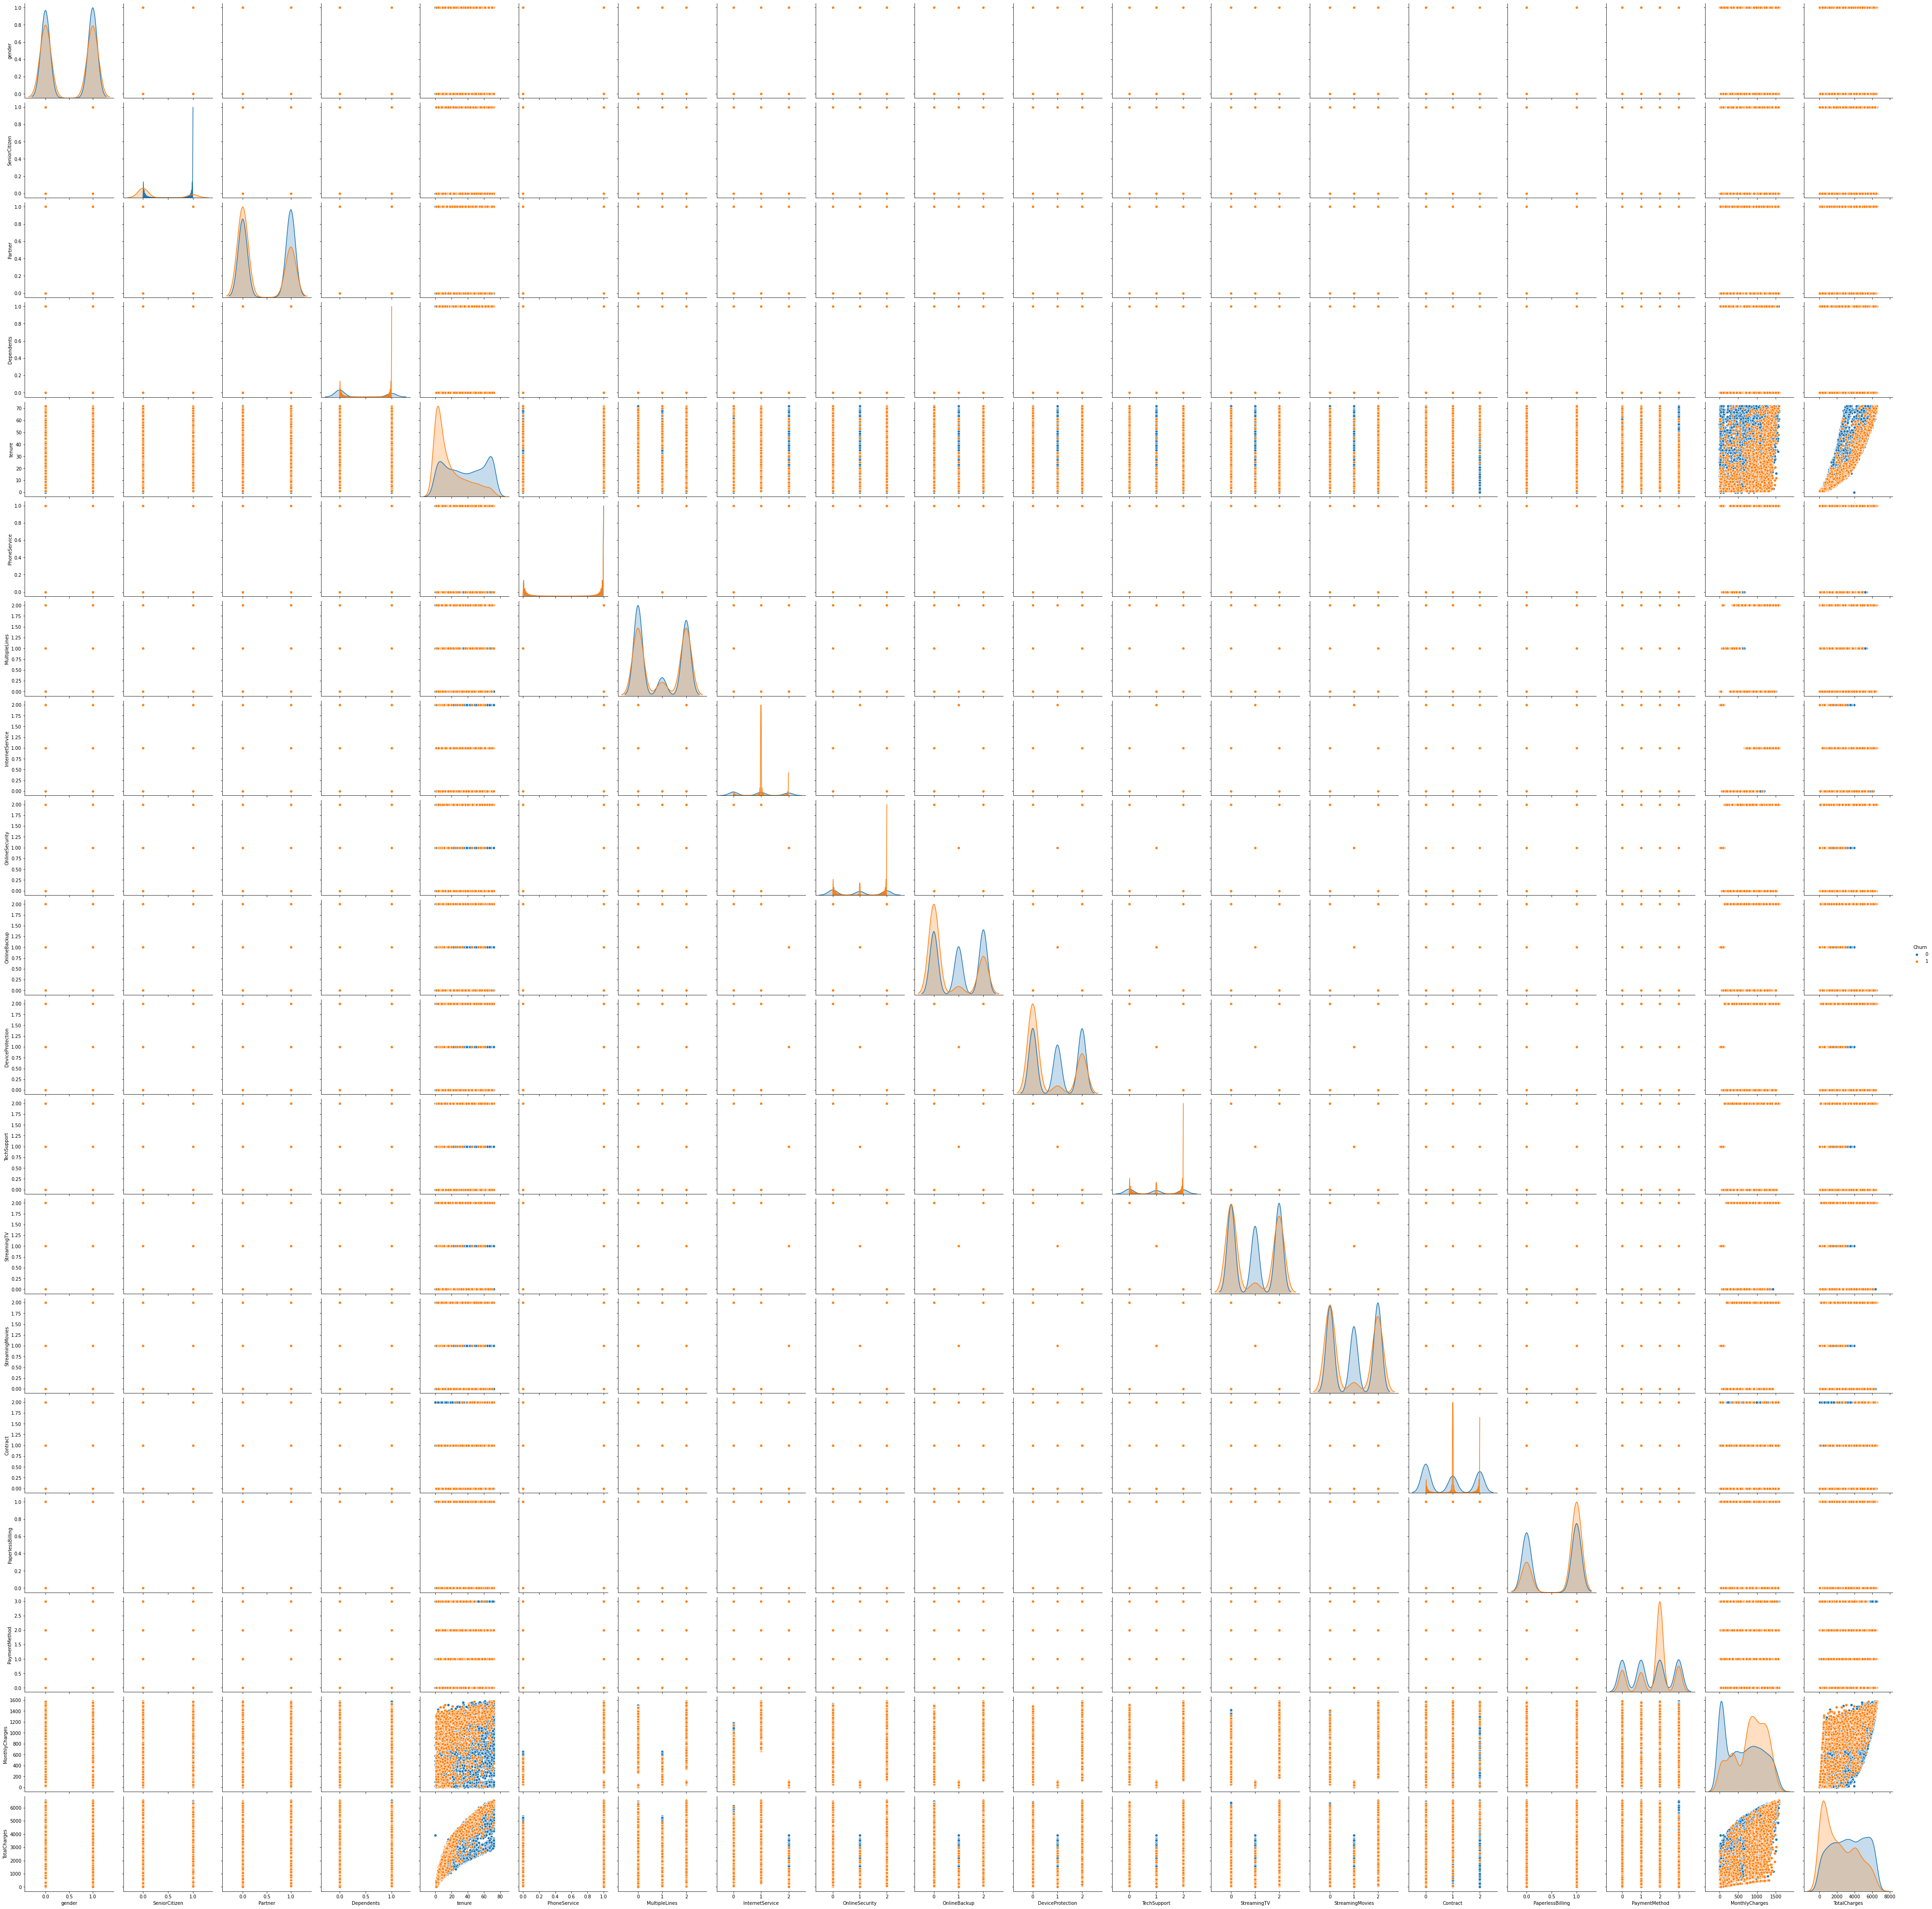

In [ ]:
import seaborn as sns
sns.pairplot(data, hue="Churn", size=3)

In [ ]:
### Conclusion: What all did you understand from the above charts
##DATA IS TOTALLY UNBALANCED
###AND THERE IS NO HIGHLY POSITIVE CORRELATION

### Implement Machine Learning Models

In [ ]:
#spliting the data
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.432, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 19) (4000,)
Test set: (3043, 19) (3043,)


In [ ]:
#for getting the optimum parameter
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
a=grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.806, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.787, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.800, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.810, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.801, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.806, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.787, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.800, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.810, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
# Fitting Kernel SVM to the Training set

from sklearn.svm import SVC
classifier = a
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#evaluating model
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies1.mean()

0.8015000000000001

In [ ]:
#svm
f1 = []
acc = []
n = 50
print("SVM:")
for i in range(n):
    svm = a
    svm.fit(X_train, y_train) 
    ypred = svm.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))
score = metrics.accuracy_score(y_test, ypred)
print(score)

SVM:
Avg F1-Score 0.7846704354830862
Max F1-Score 0.7846704354830862
Min F1-Score 0.7846704354830862
Avg Accuracy 0.7982254354255669
Max Accuracy 0.7982254354255669
Min Accuracy 0.7982254354255669
0.7982254354255669


In [ ]:
#RANDOM FOREST
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))
score = metrics.accuracy_score(y_test, ypred)
print(score)

Random Forest:
Avg F1-Score 0.7821938089925398
Max F1-Score 0.7927802327367054
Min F1-Score 0.7669709967144972
Avg Accuracy 0.7939434768320734
Max Accuracy 0.8015116661189615
Min Accuracy 0.7794939204732172
0.7834373973052908


In [ ]:
#LOGISTIC BEFORE BALANCING DATA
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    y2pred=lr.predict(X_test)
    f1.append(f1_score(y_test, y2pred, average='weighted'))
    acc.append(accuracy_score(y_test, y2pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))
score = metrics.accuracy_score(y_test, y2pred)
print(score)


In [ ]:
#data balancing wiht SMOTE
a= np.array(data.loc[:, data.columns != 'Churn'])
b = np.array(data.loc[:, data.columns == 'Churn'])
print('Shape of X: {}'.format(a.shape))
print('Shape of y: {}'.format(b.shape))


from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Shape of X: (7043, 19)
Shape of y: (7043, 1)
Number transactions X_train dataset:  (4000, 19)
Number transactions y_train dataset:  (4000,)
Number transactions X_test dataset:  (3043, 19)
Number transactions y_test dataset:  (3043,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#AFTER BALANCING DATA RANDOM FOREST
f1 = []
acc = []
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    y1pred=rf.predict(X_test)
    f1.append(f1_score(y_test, y1pred, average='weighted'))
    acc.append(accuracy_score(y_test, y1pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))
score = metrics.accuracy_score(y_test, y1pred)
print(score)

Random Forest:
Avg F1-Score 0.7808931857954097
Max F1-Score 0.7902309315463599
Min F1-Score 0.7611294210564632
Avg Accuracy 0.7906473874465989
Max Accuracy 0.7988826815642458
Min Accuracy 0.7745645744331252
0.796910943148209


In [ ]:
#LOGISTIC AFTER BALANCING DATA
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    y2pred=lr.predict(X_test)
    f1.append(f1_score(y_test, y2pred, average='weighted'))
    acc.append(accuracy_score(y_test, y2pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))
score = metrics.accuracy_score(y_test, y2pred)
print(score)

Logistic:
Avg F1-Score 0.7952316406821771
Max F1-Score 0.8165797078983908
Min F1-Score 0.7658653207537398
Avg Accuracy 0.8042236712385631
Max Accuracy 0.8218862964180086
Min Accuracy 0.7850805126519882
0.8156424581005587


In [ ]:
#SUPPORT VECTOR MACHINE
f1 = []
acc = []
n = 50
print("SVM:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.432)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train) 
    ypred = svm.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))
score = metrics.accuracy_score(y_test, ypred)
print(score)

SVM:
Avg F1-Score 0.7805729518747804
Max F1-Score 0.7979565026005044
Min F1-Score 0.7658653207537398
Avg Accuracy 0.7977522182057182
Max Accuracy 0.8120276043378245
Min Accuracy 0.7890239894840618
0.7965823200788695


### Model Evaluation

accuracy:   81.564
[[2073  201]
 [ 360  409]]


Text(25.5, 0.5, 'true values')

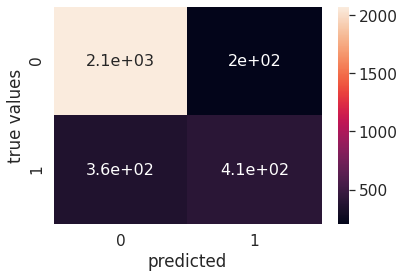

In [ ]:
#logestic regression
score = metrics.accuracy_score(y_test, y2pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, y2pred, labels=[0,1])
print(cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")


### Final Conclusions

            I have used 3 Algo to predict churn(SVM,Random forest,logestic regression). Max accuracy by logestic regression algo that is 81.564.
            I can improve its accuracy but currently i am having time issue as i responded the mail very late
      